In [3]:
#importing the library
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
#loading the dataset
df=pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv',delimiter=';')
#showing the dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
#getting prliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#checkig the missing values in the dataset
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [23]:
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [26]:
#Creating preprocessing function
def preprocessing_input(df):
    df=df.copy()
    #dropping the ID  column
    df=df.drop('ID',axis=1)
    #filling Income missing value with the mean of that column
    df['Income']=df['Income'].fillna(df['Income'].mean())
    df['Dt_Month']=pd.to_datetime(df['Dt_Customer']).dt.month
    df['Dt_Year']=pd.to_datetime(df['Dt_Customer']).dt.year
    df['Dt_Day']=pd.to_datetime(df['Dt_Customer']).dt.day
    df=df.drop('Dt_Customer',axis=1)

    df=onehot_encode(df,['Education','Marital_Status'])
    for column in df.columns:
        if df[column].dtype=='bool':
            df[column]=df[column].astype(int)

    y=df['Response']
    x=df.drop('Response',axis=1)

    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
    scaler=StandardScaler()

    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)


    
    return x_train,x_test,y_train,y_test

In [27]:
x_train,x_test,y_train,y_test=preprocessing_input(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1568, 40)
(672, 40)
(1568,)
(672,)


In [28]:
x_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Dt_Month,Dt_Year,Dt_Day,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1584,1.525106,1.366274,-0.838503,-0.926149,-1.081191,-0.412795,-0.081535,1.141698,-0.201264,0.911893,0.602114,-0.674976,-0.384490,2.483203,2.261347,-1.796002,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,-1.243808,1.428667,1.059670,-0.314338,-0.157596,0.994911,-0.450973,-0.522233,-0.025262,-0.035737,2.925914,-0.788359,-0.516293,-0.601908,-0.185205,-0.025262
203,0.679861,2.326313,-0.838503,-0.926149,0.157717,1.365107,0.069198,-0.117738,0.678695,3.580464,0.260002,-1.173029,1.011065,2.145035,1.330530,-0.569286,-0.295599,3.505444,3.640679,3.915780,-0.113666,-0.091434,0.0,0.0,1.320864,-1.491998,-1.542354,-0.314338,-0.157596,-1.005115,-0.450973,1.914854,-0.025262,-0.035737,-0.341773,-0.788359,-0.516293,1.661383,-0.185205,-0.025262
1950,-2.447544,-0.028619,-0.838503,-0.926149,1.603109,-0.469096,-0.659347,-0.694613,-0.686140,-0.650783,-0.728321,-0.674976,-0.384490,-0.560306,-0.531104,-0.160381,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,0.181010,-0.031665,-0.863565,-0.314338,-0.157596,-1.005115,-0.450973,1.914854,-0.025262,-0.035737,-0.341773,-0.788359,1.936883,-0.601908,-0.185205,-0.025262
1812,0.003666,1.291175,-0.838503,-0.926149,0.777170,0.799142,-0.458369,0.296203,-0.273098,0.839770,-0.519253,-0.674976,-0.035601,0.116029,0.089441,-1.796002,-0.295599,-0.285271,-0.274674,3.915780,-0.113666,-0.091434,0.0,0.0,-0.103954,1.428667,1.399064,-0.314338,-0.157596,-1.005115,2.217427,-0.522233,-0.025262,-0.035737,-0.341773,1.268458,-0.516293,-0.601908,-0.185205,-0.025262
925,0.848910,-1.262882,-0.838503,-0.926149,1.671937,-0.679481,0.044076,0.230148,-0.506556,-0.073795,1.343356,0.321130,0.662176,-0.560306,0.089441,1.066336,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,0.465974,-1.491998,1.738459,-0.314338,-0.157596,-1.005115,2.217427,-0.522233,-0.025262,-0.035737,-0.341773,-0.788359,-0.516293,1.661383,-0.185205,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,-1.095152,0.124118,1.023782,0.900520,-1.700645,0.449487,-0.659347,0.027582,-0.542473,-0.194001,-0.234160,4.803605,1.708843,-0.222138,0.709985,1.066336,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,0.750937,-1.491998,-0.184777,-0.314338,-0.157596,0.994911,-0.450973,-0.522233,-0.025262,-0.035737,-0.341773,-0.788359,-0.516293,1.661383,-0.185205,-0.025262
2154,0.595337,-0.978595,1.023782,-0.926149,-1.494160,-0.869124,-0.634225,-0.703420,-0.614306,-0.530577,-0.709315,-0.674976,-1.082267,-0.898473,-0.841376,0.657430,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,-0.103954,-0.031665,1.285933,-0.314338,-0.157596,-1.005115,2.217427,-0.522233,-0.025262,-0.035737,-0.341773,-0.788359,-0.516293,1.661383,-0.185205,-0.025262
1766,0.933435,-0.690477,1.023782,-0.926149,-0.909120,-0.848382,-0.634225,-0.716631,-0.686140,-0.650783,-0.823352,-0.674976,-1.082267,-0.898473,-0.841376,-0.160381,-0.295599,-0.285271,-0.274674,-0.255377,-0.113666,-0.091434,0.0,0.0,-0.103954,1.428667,0.041486,-0.314338,-0.157596,-1.005115,-0.450973,1.914854,-0.025262,-0.035737,-0.341773,-0.788359,1.936883,-0.601908,-0.185205,-0.025262
1122,0.341763,0.012600,1.023782,0.900520,0.605100,-0.463169,-0.659347,-0.315901,-0.560431,-0.338248,0.545095,1.317235,-0.035601,-0.222138,-0.220832,0.657430,-0.295599,-0.28527

In [29]:
y_train

1584    1
203     1
1950    0
1812    0
925     0
       ..
1147    0
2154    0
1766    0
1122    0
1346    0
Name: Response, Length: 1568, dtype: int64

In [30]:
x_train.shape

(1568, 40)

In [32]:
y_train.unique()

array([1, 0])

In [33]:
y_train.value_counts()

Response
0    1334
1     234
Name: count, dtype: int64

In [36]:
#Constructing the model
inputs=tf.keras.Input(shape=(40,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,callbacks=[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=3,restore_best_weights=True
)])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7464 - auc: 0.4418 - loss: 0.5696 - val_accuracy: 0.8503 - val_auc: 0.7830 - val_loss: 0.3649
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8690 - auc: 0.8200 - loss: 0.3336 - val_accuracy: 0.8726 - val_auc: 0.8431 - val_loss: 0.3233
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8920 - auc: 0.8935 - loss: 0.2792 - val_accuracy: 0.8758 - val_auc: 0.8562 - val_loss: 0.3044
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8930 - auc: 0.9132 - loss: 0.2586 - val_accuracy: 0.8758 - val_auc: 0.8637 - val_loss: 0.2975
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - auc: 0.9224 - loss: 0.2270 - val_accuracy: 0.8726 - val_auc: 0.8642 - val_loss: 0.3019
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9152 - auc: 0.9402 - loss: 0.2122 - val_accuracy: 0.8854 - val_auc: 0.8681 - val_loss: 0.3047
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [37]:
model.evaluate(x_test,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - auc: 0.8763 - loss: 0.3164 


[0.2842075526714325, 0.8839285969734192, 0.8856555819511414]

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


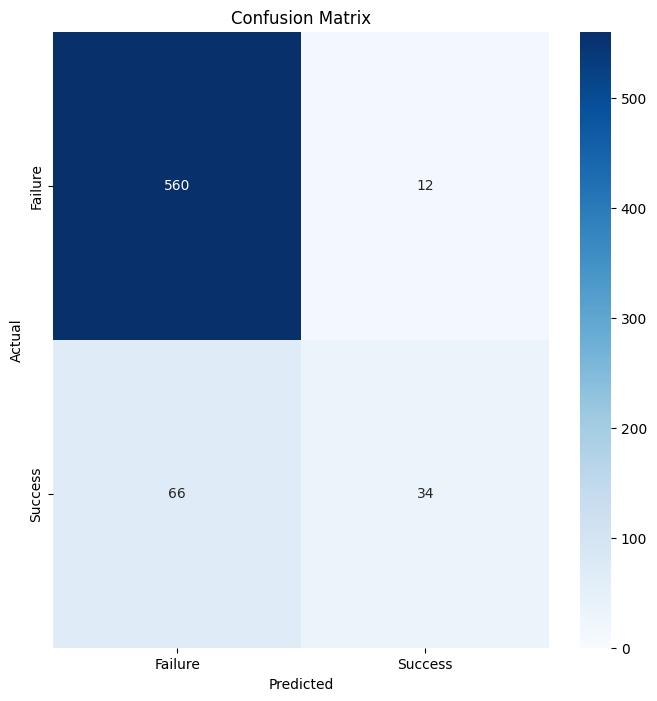

In [50]:
y_pred=model.predict(x_test)
y_pred=np.array(np.squeeze(y_pred)>0.5,dtype=int)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues')
plt.xticks(ticks=np.arange(2)+0.5,labels=['Failure','Success'])
plt.yticks(ticks=np.arange(2)+0.5,labels=['Failure','Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       626
           1       0.34      0.74      0.47        46

    accuracy                           0.88       672
   macro avg       0.66      0.82      0.70       672
weighted avg       0.94      0.88      0.90       672



In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)